In [2]:

import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
dir_path = "/Users/shtabari/Projects/AITX/backroom/notebooks/"
calendar_path = dir_path + "calendar.csv"
sales_path = dir_path + "sales_train_evaluation.csv"
calendar_path, sales_path

('/Users/shtabari/Projects/AITX/backroom/notebooks/calendar.csv',
 '/Users/shtabari/Projects/AITX/backroom/notebooks/sales_train_evaluation.csv')

In [4]:
calendar = pd.read_csv(calendar_path)
sales = pd.read_csv(sales_path)


In [5]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [6]:
sales

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [7]:
day_cols = [c for c in sales.columns if re.fullmatch(r"d_\d+", c)]


In [8]:
wide = sales.groupby("item_id", as_index=False)[day_cols].sum()

long_sales = wide.melt(id_vars=["item_id"], value_vars=day_cols,
                       var_name="d", value_name="sales")
long_sales

,item_id,d,sales
0,FOODS_1_001,d_1,6
1,FOODS_1_002,d_1,4
2,FOODS_1_003,d_1,14
3,FOODS_1_004,d_1,0
4,FOODS_1_005,d_1,34
...,...,...,...
5918104,HOUSEHOLD_2_512,d_1941,7
5918105,HOUSEHOLD_2_513,d_1941,4
5918106,HOUSEHOLD_2_514,d_1941,3
5918107,HOUSEHOLD_2_515,d_1941,1


In [9]:
item_daily = long_sales.merge(calendar[["d", "date"]], on="d", how="left")
item_daily["date"] = pd.to_datetime(item_daily["date"], errors="coerce")
item_daily = item_daily.sort_values(["item_id", "date"]).reset_index(drop=True)


In [10]:
# >>> ADD FILTER BLOCK HERE <<<
# Example: keep only the last 30 days
from datetime import timedelta

N_DAYS = 90
max_date = item_daily["date"].max()
cutoff = max_date - timedelta(days=N_DAYS)
item_daily = item_daily[item_daily["date"] >= cutoff]

In [11]:
# Save tidy output for the user
# out_csv = "/mnt/data/item_daily_sales.csv"
# item_daily.to_csv(out_csv, index=False)

In [12]:
totals = item_daily.groupby("item_id", as_index=False)["sales"].sum().sort_values("sales", ascending=False)
totals

,item_id,sales
702,FOODS_3_090,50170
1198,FOODS_3_586,37802
864,FOODS_3_252,26051
1199,FOODS_3_587,21514
1167,FOODS_3_555,21240
...,...,...
2852,HOUSEHOLD_2_320,24
1175,FOODS_3_563,22
1962,HOBBIES_2_110,17
2641,HOUSEHOLD_2_108,5


In [13]:
top_item_id = totals.iloc[0]["item_id"]
top_item_units = int(totals.iloc[0]["sales"])

In [14]:
TOP_N = 12
top_items = totals.head(TOP_N)["item_id"].tolist()
top_items

['FOODS_3_090',
 'FOODS_3_586',
 'FOODS_3_252',
 'FOODS_3_587',
 'FOODS_3_555',
 'FOODS_3_120',
 'FOODS_3_694',
 'FOODS_3_681',
 'FOODS_3_714',
 'FOODS_3_226',
 'FOODS_3_723',
 'FOODS_3_282']

In [15]:
top_items.remove("FOODS_3_120")
top_items

['FOODS_3_090',
 'FOODS_3_586',
 'FOODS_3_252',
 'FOODS_3_587',
 'FOODS_3_555',
 'FOODS_3_694',
 'FOODS_3_681',
 'FOODS_3_714',
 'FOODS_3_226',
 'FOODS_3_723',
 'FOODS_3_282']

In [16]:
today = pd.Timestamp.today().normalize()   # midnight today
data_last_date = item_daily["date"].max()
shift_delta = today - data_last_date
item_daily["date"] = item_daily["date"] + shift_delta

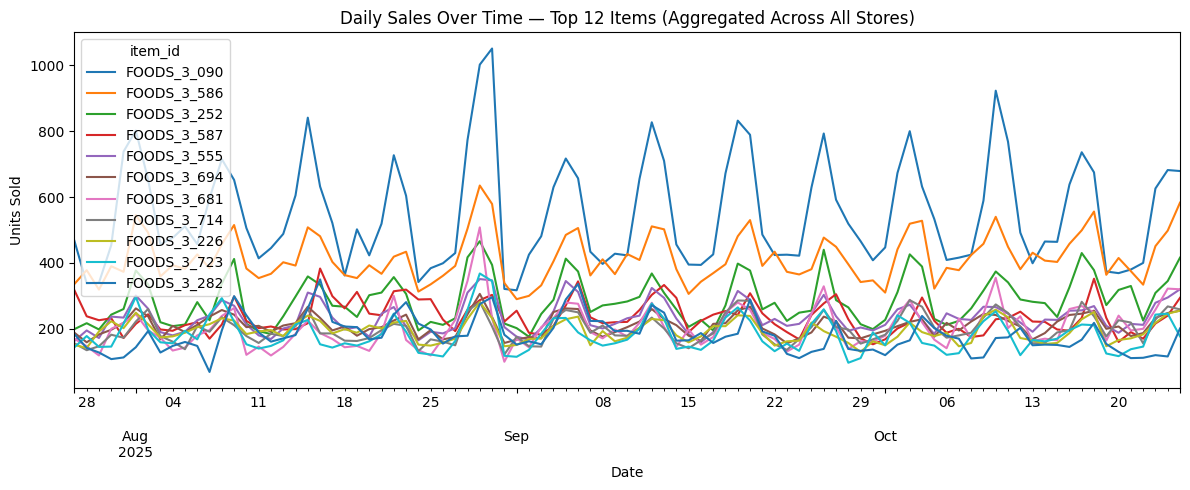

In [17]:
plt.figure(figsize=(12, 5))
for iid in top_items:
    series = item_daily[item_daily["item_id"] == iid].groupby("date", as_index=True)["sales"].sum()
    series.plot(label=iid)

plt.title(f"Daily Sales Over Time — Top {TOP_N} Items (Aggregated Across All Stores)")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend(title="item_id")
plt.tight_layout()
plt.show()

In [18]:
ITEM = "FOODS_1_001"    # <-- change this to the item you want to forecast
FUTURE_PERIODS = 30     # forecast horizon

df_item = (
    item_daily[item_daily["item_id"] == ITEM][["date", "sales"]]
    .copy()
)

# ensure datetime and sorted
df_item["date"] = pd.to_datetime(df_item["date"])
df_item = df_item.sort_values("date")

# fill missing days with 0
full_idx = pd.date_range(df_item["date"].min(), df_item["date"].max(), freq="D")
df_item = (
    df_item.set_index("date")
           .reindex(full_idx)
           .rename_axis("date")
           .fillna({"sales": 0})
           .reset_index()
)

# rename for Prophet
dfp = df_item.rename(columns={"date": "ds", "sales": "y"})[["ds", "y"]]
dfp


,ds,y
0,2025-07-27,6
1,2025-07-28,4
2,2025-07-29,1
3,2025-07-30,1
4,2025-07-31,3
...,...,...
86,2025-10-21,7
87,2025-10-22,5
88,2025-10-23,7
89,2025-10-24,5


/opt/anaconda3/envs/aitx/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
10:10:14 - cmdstanpy - INFO - Chain [1] start processing
10:10:14 - cmdstanpy - INFO - Chain [1] done processing


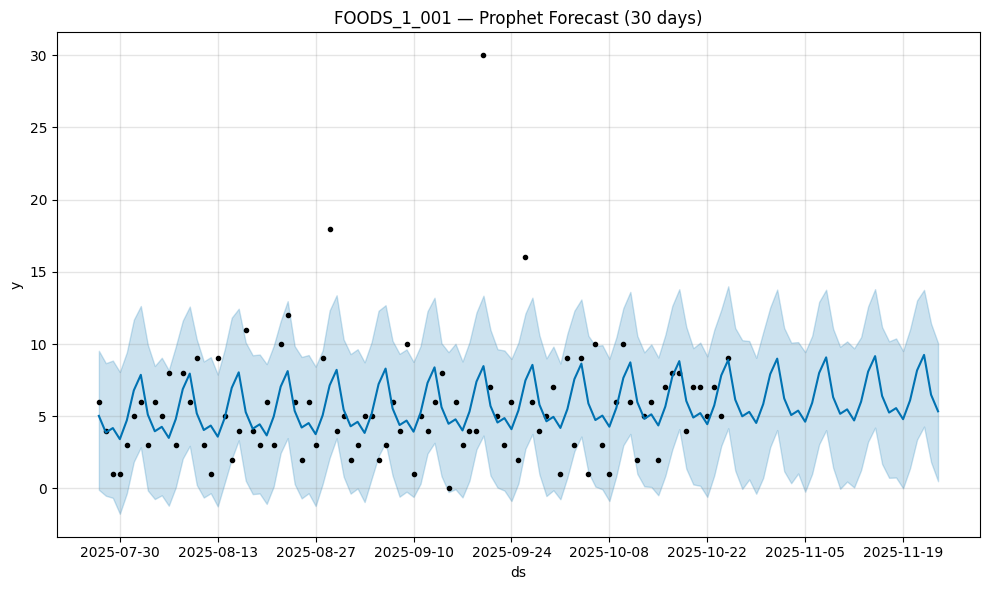

In [19]:
# -----------------------------
# 2) Transform: log1p
# -----------------------------
# dfp["y"] = np.log1p(dfp["y"])

# -----------------------------
# 3) Fit Prophet
# -----------------------------
from prophet import Prophet

m = Prophet(
    weekly_seasonality=True,     # capture weekends
    daily_seasonality=False,     # no sub-daily seasonality
    yearly_seasonality=False,    # unless you have >1yr of data
    seasonality_mode="additive"
)
m.fit(dfp)

# -----------------------------
# 4) Forecast
# -----------------------------
future = m.make_future_dataframe(periods=FUTURE_PERIODS, freq="D")
fcst = m.predict(future)

# # invert log1p
# for col in ("yhat", "yhat_lower", "yhat_upper"):
#     fcst[col] = np.expm1(fcst[col]).clip(lower=0)

# -----------------------------
# 5) Show plots (instead of saving)
# -----------------------------
fig1 = m.plot(fcst)
plt.title(f"{ITEM} — Prophet Forecast ({FUTURE_PERIODS} days)")
plt.tight_layout()
plt.show()



In [20]:
from prophet import Prophet


In [21]:
df_item.to_csv("df_item.csv", index=False)

In [27]:
df_item

,date,sales
0,2025-07-27,6
1,2025-07-28,4
2,2025-07-29,1
3,2025-07-30,1
4,2025-07-31,3
...,...,...
86,2025-10-21,7
87,2025-10-22,5
88,2025-10-23,7
89,2025-10-24,5


In [41]:
sales = item_daily[item_daily['item_id'].isin(top_items)][['item_id', 'date', 'sales']].rename(columns={'sales': 'sale'})
sales

,item_id,date,sale
1364432,FOODS_3_090,2025-07-27,467
1364433,FOODS_3_090,2025-07-28,338
1364434,FOODS_3_090,2025-07-29,340
1364435,FOODS_3_090,2025-07-30,454
1364436,FOODS_3_090,2025-07-31,738
...,...,...,...
2591230,FOODS_3_723,2025-10-21,138
2591231,FOODS_3_723,2025-10-22,146
2591232,FOODS_3_723,2025-10-23,243
2591233,FOODS_3_723,2025-10-24,246


In [42]:
sales.to_parquet("sales.parquet", index=False)

In [46]:
sales['item_id'].unique()

array(['FOODS_3_090', 'FOODS_3_226', 'FOODS_3_252', 'FOODS_3_282',
       'FOODS_3_555', 'FOODS_3_586', 'FOODS_3_587', 'FOODS_3_681',
       'FOODS_3_694', 'FOODS_3_714', 'FOODS_3_723'], dtype=object)

In [53]:
sales.date.min(), sales.date.max()

(Timestamp('2025-07-27 00:00:00'), Timestamp('2025-10-25 00:00:00'))

In [56]:
sales.groupby('item_id').agg({'sale': 'max'}).reset_index()

,item_id,sale
0,FOODS_3_090,1051
1,FOODS_3_226,281
2,FOODS_3_252,466
3,FOODS_3_282,350
4,FOODS_3_555,351
5,FOODS_3_586,635
6,FOODS_3_587,383
7,FOODS_3_681,508
8,FOODS_3_694,306
9,FOODS_3_714,287


In [73]:
price_df = pd.read_csv(dir_path + "sell_prices.csv")
price_df = price_df.groupby('item_id').agg({'sell_price': 'mean'}).reset_index()
price_df = price_df[price_df['item_id'].isin(top_items)]

price_df

,item_id,sell_price
702,FOODS_3_090,1.364521
838,FOODS_3_226,1.605887
864,FOODS_3_252,1.520355
894,FOODS_3_282,2.505997
1167,FOODS_3_555,1.595887
1198,FOODS_3_586,1.595922
1199,FOODS_3_587,2.515532
1293,FOODS_3_681,1.101545
1306,FOODS_3_694,1.605851
1325,FOODS_3_714,1.524043


In [75]:
item_ids = [
    'FOODS_3_090', 'FOODS_3_226', 'FOODS_3_252', 'FOODS_3_282',
    'FOODS_3_555', 'FOODS_3_586', 'FOODS_3_587', 'FOODS_3_681',
    'FOODS_3_694', 'FOODS_3_714', 'FOODS_3_723'
]

# Example descriptions for each item (customize as needed)
descriptions = [
    "Vanilla Ice Cream, 1L tub, creamy white",
    "Banana, organic, yellow bunch",
    "Red Apple, crisp, 6-pack bag",
    "Chocolate Ice Cream, 1L tub, rich brown",
    "Strawberry Yogurt, 4-pack, pink cups",
    "Whole Milk, 1 gallon, blue label",
    "Greek Yogurt, plain, 500g, white tub",
    "Orange Juice, 1L carton, orange color",
    "Blueberry Muffins, 4-pack, blue label",
    "Cheddar Cheese, 200g block, yellow",
    "Spinach, fresh bag, green leaves"
]

item_dim_df = pd.DataFrame({
    'item_id': item_ids,
    'description': descriptions
})

# Merge with price_df to get price
item_dim_df = item_dim_df.merge(price_df[['item_id', 'sell_price']], on='item_id', how='left')
item_dim_df = item_dim_df.rename(columns={'sell_price': 'price'})

# Add constant columns
item_dim_df['lead_time'] = 3
item_dim_df['holding_cost'] = 0.5

item_dim_df

,item_id,description,price,lead_time,holding_cost
0,FOODS_3_090,"Vanilla Ice Cream, 1L tub, creamy white",1.364521,3,0.5
1,FOODS_3_226,"Banana, organic, yellow bunch",1.605887,3,0.5
2,FOODS_3_252,"Red Apple, crisp, 6-pack bag",1.520355,3,0.5
3,FOODS_3_282,"Chocolate Ice Cream, 1L tub, rich brown",2.505997,3,0.5
4,FOODS_3_555,"Strawberry Yogurt, 4-pack, pink cups",1.595887,3,0.5
5,FOODS_3_586,"Whole Milk, 1 gallon, blue label",1.595922,3,0.5
6,FOODS_3_587,"Greek Yogurt, plain, 500g, white tub",2.515532,3,0.5
7,FOODS_3_681,"Orange Juice, 1L carton, orange color",1.101545,3,0.5
8,FOODS_3_694,"Blueberry Muffins, 4-pack, blue label",1.605851,3,0.5
9,FOODS_3_714,"Cheddar Cheese, 200g block, yellow",1.524043,3,0.5


In [57]:
INVENTORY_UNIT = 2000  # set your constant inventory value here

inventory = (
    sales[['item_id', 'date']]
    .drop_duplicates()
    .assign(unit=INVENTORY_UNIT)
    .reset_index(drop=True)
)
inventory


,item_id,date,unit
0,FOODS_3_090,2025-07-27,2000
1,FOODS_3_090,2025-07-28,2000
2,FOODS_3_090,2025-07-29,2000
3,FOODS_3_090,2025-07-30,2000
4,FOODS_3_090,2025-07-31,2000
...,...,...,...
996,FOODS_3_723,2025-10-21,2000
997,FOODS_3_723,2025-10-22,2000
998,FOODS_3_723,2025-10-23,2000
999,FOODS_3_723,2025-10-24,2000


In [60]:
inventory = (
    sales.groupby('item_id').agg({'sale': 'max'}).reset_index()
    .assign(unit=lambda df: df['sale'] * 2)
    .drop(columns=['sale'])
)
inventory

,item_id,unit
0,FOODS_3_090,2102
1,FOODS_3_226,562
2,FOODS_3_252,932
3,FOODS_3_282,700
4,FOODS_3_555,702
5,FOODS_3_586,1270
6,FOODS_3_587,766
7,FOODS_3_681,1016
8,FOODS_3_694,612
9,FOODS_3_714,574


In [61]:
inventory.to_parquet("inventory.parquet", index=False)